In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import scipy.stats as ss
import warnings
warnings.filterwarnings("ignore")
from scipy.optimize import minimize
# from sklearn.utils import resample
plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
df = pd.read_csv('merged.csv', index_col='Date')

In [3]:
df.head()

,Unnamed: 0,High,Low,Open,Close,Volume,Adj Close,Typical_Price,Mkt-RF,SMB,HML,RF,ADS_Index_010920
Date,,,,,,,,,,,,,
2014-01-02,0,399.359985,394.019989,398.799988,397.970001,2137800,397.970001,397.116659,-0.88,-0.27,0.12,0.0,-0.365855
2014-01-03,1,402.709991,396.220001,398.290009,396.440002,2210200,396.440002,398.456665,0.03,0.36,0.05,0.0,-0.378983
2014-01-06,2,397.000000,388.420013,395.850006,393.630005,3170600,393.630005,393.016673,-0.34,-0.57,0.26,0.0,-0.412198
2014-01-07,3,398.470001,394.290009,395.040009,398.029999,1916000,398.029999,396.930003,0.68,0.40,-0.41,0.0,-0.420924
2014-01-08,4,403.000000,396.040009,398.470001,401.920013,2316500,401.920013,400.320007,0.04,0.01,-0.11,0.0,-0.428513


In [4]:
df.tail(10)

,Unnamed: 0,High,Low,Open,Close,Volume,Adj Close,Typical_Price,Mkt-RF,SMB,HML,RF,ADS_Index_010920
Date,,,,,,,,,,,,,
2019-12-17,1500,1792.000000,1777.390015,1778.010010,1790.660034,3644400,1790.660034,1786.683350,0.10,0.42,0.68,0.007,0.365601
2019-12-18,1501,1798.199951,1782.359985,1795.020020,1784.030029,3351400,1784.030029,1788.196655,-0.05,0.17,0.13,0.007,0.365959
2019-12-19,1502,1792.989990,1774.060059,1780.500000,1792.280029,2652800,1792.280029,1786.443359,0.43,-0.02,-0.43,0.007,0.365927
2019-12-20,1503,1802.969971,1782.449951,1799.619995,1786.500000,5150800,1786.500000,1790.639974,0.48,-0.30,-0.29,0.007,0.365506
2019-12-23,1504,1793.000000,1784.510010,1788.260010,1793.000000,2136400,1793.000000,1790.170003,0.10,0.19,-0.28,0.007,0.362338
2019-12-24,1505,1795.569946,1787.579956,1793.810059,1789.209961,881300,1789.209961,1790.786621,0.01,0.38,-0.07,0.007,0.361096
2019-12-26,1506,1870.459961,1799.500000,1801.010010,1868.770020,6005400,1868.770020,1846.243327,0.49,-0.53,0.00,0.007,0.358356
2019-12-27,1507,1901.400024,1866.010010,1882.920044,1869.800049,6186600,1869.800049,1879.070028,-0.09,-0.52,-0.07,0.007,0.356857
2019-12-30,1508,1884.000000,1840.619995,1874.000000,1846.890015,3674700,1846.890015,1857.170003,-0.57,0.17,0.58,0.007,0.351973


In [5]:
df.size

19630

In [6]:
len(df)

1510

In [7]:
df['Typical_Price'] = df[['High','Low','Close']].mean(axis=1)
df.head()

,Unnamed: 0,High,Low,Open,Close,Volume,Adj Close,Typical_Price,Mkt-RF,SMB,HML,RF,ADS_Index_010920
Date,,,,,,,,,,,,,
2014-01-02,0,399.359985,394.019989,398.799988,397.970001,2137800,397.970001,397.116659,-0.88,-0.27,0.12,0.0,-0.365855
2014-01-03,1,402.709991,396.220001,398.290009,396.440002,2210200,396.440002,398.456665,0.03,0.36,0.05,0.0,-0.378983
2014-01-06,2,397.000000,388.420013,395.850006,393.630005,3170600,393.630005,393.016673,-0.34,-0.57,0.26,0.0,-0.412198
2014-01-07,3,398.470001,394.290009,395.040009,398.029999,1916000,398.029999,396.930003,0.68,0.40,-0.41,0.0,-0.420924
2014-01-08,4,403.000000,396.040009,398.470001,401.920013,2316500,401.920013,400.320007,0.04,0.01,-0.11,0.0,-0.428513


In [8]:
df['Typical_Price_returns'] = (np.log(df.Typical_Price) - np.log(df.Typical_Price.shift(1))) * 100.
df['Volume_returns'] = (np.log(df.Volume) - np.log(df.Volume.shift(1))) * 100.
df.head()

,Unnamed: 0,High,Low,Open,Close,Volume,Adj Close,Typical_Price,Mkt-RF,SMB,HML,RF,ADS_Index_010920,Typical_Price_returns,Volume_returns
Date,,,,,,,,,,,,,,,
2014-01-02,0,399.359985,394.019989,398.799988,397.970001,2137800,397.970001,397.116659,-0.88,-0.27,0.12,0.0,-0.365855,NaN,NaN
2014-01-03,1,402.709991,396.220001,398.290009,396.440002,2210200,396.440002,398.456665,0.03,0.36,0.05,0.0,-0.378983,0.336866,3.330575
2014-01-06,2,397.000000,388.420013,395.850006,393.630005,3170600,393.630005,393.016673,-0.34,-0.57,0.26,0.0,-0.412198,-1.374671,36.083784
2014-01-07,3,398.470001,394.290009,395.040009,398.029999,1916000,398.029999,396.930003,0.68,0.40,-0.41,0.0,-0.420924,0.990791,-50.368116
2014-01-08,4,403.000000,396.040009,398.470001,401.920013,2316500,401.920013,400.320007,0.04,0.01,-0.11,0.0,-0.428513,0.850430,18.981775


# Model 1: AutoRegressive Model 

In [9]:
class ar1:
    
    def fit(X,Y):
        
        invXX = np.linalg.inv(X.transpose()@X)
        beta_hat = invXX@X.transpose()@Y
        y_hat = X@beta_hat
        residuals = Y - y_hat
        T = Y.shape[0]
        N = X.shape
        
        sigma2 = (1/T)*residuals.transpose()@residuals
        sigma = np.sqrt(sigma2)
        varcov_beta_hat = (sigma2)*invXX
        std_beta_hat = np.sqrt(T*np.diag(varcov_beta_hat))
        R_square = 1 - (residuals.transpose()@residuals)/(T*np.var(Y))
        adj_R_square = 1-(1-R_square)*(T-1)/(T-N[1])
        t_stat = (beta_hat.transpose()-0)/std_beta_hat
        p_val = 1-ss.norm.cdf(t_stat)
        F_stat = (beta_hat.transpose()@np.linalg.inv(varcov_beta_hat)@beta_hat/N[1])/(residuals.transpose()@residuals/(T-N[1]))
        p_val_F = 1 - ss.f.cdf(F_stat,N[1]-1,T-N[1])
#         rmse = np.sqrt(np.mean((Y-y_hat)**2))
#         ar1.metrics(beta_hat,R_square,adj_R_square,p_val,Y,y_hat,rmse)
        return beta_hat,y_hat
    
    def metrics(beta_hat,R_square,adj_R_square,p_val,Y,y_hat,rmse):
        
        t = PrettyTable(['Metrics', 'Values'])
        t.add_row(['Beta Values', beta_hat])
        t.add_row(['RMSE',rmse])
        t.add_row(['R-Square',R_square])
        t.add_row(['Adjusted R-Square',adj_R_square])
        t.add_row(['P values',p_val])
        print(t)
        plt.plot(Y)
        plt.plot(y_hat)



In [10]:
    X_ar = df[['Typical_Price','Volume']].as_matrix()[1:]
    X_ar = np.column_stack([np.ones((len(X_ar),1)),X_ar])
    Y_ar = df[['Open']].as_matrix()[:-1]

    y_hat_1 = ar1.fit(X_ar,Y_ar)

# Model 2: FamaFrench Model 

In [12]:
class Fama_French_5F:
    
    def fit(X,Y):
        
        invXX = np.linalg.inv(X.transpose()@X)
        beta_hat = invXX@X.transpose()@Y
        y_hat = X@beta_hat
        residuals = Y - y_hat
        T = Y.shape[0]
        N = X.shape
        
        sigma2 = (1/T)*residuals.transpose()@residuals
        sigma = np.sqrt(sigma2)
        varcov_beta_hat = (sigma2)*invXX
        std_beta_hat = np.sqrt(T*np.diag(varcov_beta_hat))
        R_square = 1 - (residuals.transpose()@residuals)/(T*np.var(Y))
        adj_R_square = 1-(1-R_square)*(T-1)/(T-N[1])
        t_stat = (beta_hat.transpose()-0)/std_beta_hat
        p_val = 1-ss.norm.cdf(t_stat)
        F_stat = (beta_hat.transpose()@np.linalg.inv(varcov_beta_hat)@beta_hat/N[1])/(residuals.transpose()@residuals/(T-N[1]))
        p_val_F = 1 - ss.f.cdf(F_stat,N[1]-1,T-N[1])
        #rmse = np.sqrt(np.mean((Y-y_hat)**2))
        #ar1.metrics(beta_hat,R_square,adj_R_square,p_val,Y,y_hat,rmse)
        return beta_hat,y_hat
    
    def metrics(beta_hat,R_square,adj_R_square,p_val,Y,y_hat,rmse):
        
        t = PrettyTable(['Metrics', 'Values'])
        t.add_row(['Beta Values', beta_hat])
        t.add_row(['RMSE',rmse])
        t.add_row(['R-Square',R_square])
        t.add_row(['Adjusted R-Square',adj_R_square])
        t.add_row(['P values',p_val])
        print(t)
        plt.plot(Y)
        plt.plot(y_hat)

In [13]:
X_FF = df[['Mkt-RF','SMB','HML','ADS_Index_010920']].as_matrix()[1:]
X_FF = np.column_stack([np.ones((len(X_FF),1)),X_FF])
Y_FF = df[['Open']].as_matrix()[:-1]

y_hat_2 = Fama_French_5F.fit(X_FF,Y_FF)

# Model 3: Moving Average Model 

In [14]:
class moving_average:
    
    def fit(X,Y):
        
        invXX = np.linalg.inv(X.transpose()@X)
        beta_hat = invXX@X.transpose()@Y
        y_hat = X@beta_hat
        residuals = Y - y_hat
        T = Y.shape[0]
        N = X.shape
        
        sigma2 = (1/T)*residuals.transpose()@residuals
        sigma = np.sqrt(sigma2)
        varcov_beta_hat = (sigma2)*invXX
        std_beta_hat = np.sqrt(T*np.diag(varcov_beta_hat))
        R_square = 1 - (residuals.transpose()@residuals)/(T*np.var(Y))
        adj_R_square = 1-(1-R_square)*(T-1)/(T-N[1])
        t_stat = (beta_hat.transpose()-0)/std_beta_hat
        p_val = 1-ss.norm.cdf(t_stat)
        F_stat = (beta_hat.transpose()@np.linalg.inv(varcov_beta_hat)@beta_hat/N[1])/(residuals.transpose()@residuals/(T-N[1]))
        p_val_F = 1 - ss.f.cdf(F_stat,N[1]-1,T-N[1])
#         rmse = np.sqrt(np.mean((Y-y_hat)**2))
#         ar1.metrics(beta_hat,R_square,adj_R_square,p_val,Y,y_hat,rmse)
        return beta_hat,y_hat
    
    def metrics(beta_hat,R_square,adj_R_square,p_val,Y,y_hat,rmse):
        
        t = PrettyTable(['Metrics', 'Values'])
        t.add_row(['Beta Values', beta_hat])
        t.add_row(['RMSE',rmse])
        t.add_row(['R-Square',R_square])
        t.add_row(['Adjusted R-Square',adj_R_square])
        t.add_row(['P values',p_val])
        print(t)
        plt.plot(Y)
        plt.plot(y_hat)






In [15]:
X_EMA = df[['Typical_Price_returns','Volume_returns']].as_matrix()[1:]
X_EMA = np.column_stack([np.ones((len(X_EMA),1)),X_EMA])
Y_EMA = df[['Open']].as_matrix()[:-1]

y_hat_3 = moving_average.fit(X_EMA,Y_EMA)

In [16]:
def Randomforest():
    
    #AR1
    N = df.shape[0] # Total Number of days
    num_boot = 400 #  Number of bootstraps
    T= 250 #Starting Value
    window = 200
    
    Y =df['Open'][-(N-(T+1)):].values
    Y_close = df['Close'][-(N-(T+1)):].values
    
    y_hat_ar = np.zeros(N-(T+1))
    
    for t in range(T+1, N):    
        # training data
        X_train = df[['Typical_Price','Volume']][t-window:t-1] # regression variables
        X_train = np.column_stack([np.ones((len(X_train),1)),X_train])
        Y_train = df['Open'][t-window:t-1].values
        # one day prediction
        X_pred = df[['Typical_Price','Volume']][t-1:t]
        X_pred = np.column_stack([np.ones((len(X_pred),1)),X_pred])
        
        yhat_train = ar1.fit(X_train, Y_train)[1]
        
        res_train =  Y_train - yhat_train
        y_pred_all = np.zeros(num_boot)
        # bootstrap method: switching residuals
        for i in range(0, num_boot):
            err = np.random.choice(res_train, (window-1, ), replace=True)
            y_bstr = yhat_train + err   
            beta_bstr = ar1.fit(X_train, y_bstr)[0]
            y_pred_bstr = X_pred@beta_bstr
            y_pred_all[i]=y_pred_bstr         
        y_pred_ar1 = y_pred_all.mean() # get mean of all bootstrap predictions        
        y_hat_ar[t-(T+1)]=y_pred_ar1 # do this for each time step
    rmse_ar1 = np.sqrt(np.mean((y_hat_ar-Y)**2))
    print(rmse_ar1)
    
    #FF
    
    y_hat_FF = np.zeros(N-(T+1))
    
    for t in range(T+1, N):    
        # training data
        X_train = df[['Mkt-RF','SMB','HML','ADS_Index_010920']][t-window:t-1] # regression variables
        X_train = np.column_stack([np.ones((len(X_train),1)),X_train])
        Y_train = df['Open'][t-window:t-1].values
        # one day prediction
        X_pred = df[['Mkt-RF','SMB','HML','ADS_Index_010920']][t-1:t]
        X_pred = np.column_stack([np.ones((len(X_pred),1)),X_pred])
        
        yhat_train = Fama_French_5F.fit(X_train, Y_train)[1]
        
        res_train =  Y_train - yhat_train
        y_pred_all = np.zeros(num_boot)
        # bootstrap method: switching residuals
        for i in range(0, num_boot):
            err = np.random.choice(res_train, (window-1, ), replace=True)
            y_bstr = yhat_train + err   
            beta_bstr = Fama_French_5F.fit(X_train, y_bstr)[0]
            y_pred_bstr = X_pred@beta_bstr
            y_pred_all[i]=y_pred_bstr         
        y_pred_FF = y_pred_all.mean() # get mean of all bootstrap predictions        
        y_hat_FF[t-(T+1)]=y_pred_FF # do this for each time step
    rmse_FF = np.sqrt(np.mean((y_hat_FF-Y)**2))
    print(rmse_FF)
    
    #MA
    
    y_hat_ma = np.zeros(N-(T+1))
    #df['ema'] = df.Typical_Price.ewm(span=5,adjust=False).mean()
    for t in range(T+1, N):    
        # training data
        X_train = df[['Typical_Price_returns','Volume_returns']][t-window:t-1] # regression variables
        X_train = np.column_stack([np.ones((len(X_train),1)),X_train])
        Y_train = df['Open'][t-window:t-1].values
        # one day prediction
        X_pred = df[['Typical_Price_returns','Volume_returns']][t-1:t]
        X_pred = np.column_stack([np.ones((len(X_pred),1)),X_pred])
        
        yhat_train = moving_average.fit(X_train, Y_train)[1]
        
        res_train =  Y_train - yhat_train
        y_pred_all = np.zeros(num_boot)
        # bootstrap method: switching residuals
        for i in range(0, num_boot):
            err = np.random.choice(res_train, (window-1, ), replace=True)
            y_bstr = yhat_train + err   
            beta_bstr = moving_average.fit(X_train, y_bstr)[0]
            y_pred_bstr = X_pred@beta_bstr
            y_pred_all[i]=y_pred_bstr         
        y_pred_ma = y_pred_all.mean() # get mean of all bootstrap predictions        
        y_hat_ma[t-(T+1)]=y_pred_ma # do this for each time step
    rmse_ma = np.sqrt(np.mean((y_hat_ma-Y)**2))
    print(rmse_ma)

    T1 = Y.shape[0]
    Y_rf = np.zeros(T1)
    for t in range(0, T1):
        if min(abs(y_hat_ar[t]-Y[t]),abs(y_hat_ma[t]-Y[t]),
               abs(y_hat_FF[t]-Y[t]))==abs(y_hat_ar[t]-Y[t]):
            Y_rf[t] = y_hat_ar[t]
        elif min(abs(y_hat_ar[t]-Y[t]),abs(y_hat_ma[t]-Y[t]),
                 abs(y_hat_FF[t]-Y[t]))==abs(y_hat_ma[t]-Y[t]):
            Y_rf[t] = y_hat_ma[t]
        elif min(abs(y_hat_ar[t]-Y[t]),abs(y_hat_ma[t]-Y[t]),
                 abs(y_hat_FF[t]-Y[t]))==abs(y_hat_FF[t]-Y[t]):
            Y_rf[t] = y_hat_FF[t]          
        else:
            Y_rf[t] = y_hat_allf[t]  
    rmse_rf=np.sqrt(np.mean((Y-Y_rf)**2))
    
    print("ar1_RMSE: ", rmse_ar1)
    print("ma_RMSE: ", rmse_ma)
    print("FF_RMSE: ", rmse_FF)
    print("random forest rmse: ", rmse_rf)
    
    timevec = np.linspace(1,T1,T1)
    plt.figure(figsize=(30,20))
    
    ax = plt.subplot(211)
    ax.plot(timevec, Y, 'blue', label = "Y: original")
    ax.plot(timevec, y_hat_ar, 'red', label = "AR1")
    ax.plot(timevec, y_hat_ma, 'green', label = "Moving Average")
    ax.plot(timevec, y_hat_FF, 'purple', label = "Farma French")
    plt.title('Models Prediction using single models')
    ax.legend(loc=2, bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
    
    
    ax = plt.subplot(212)
    ax.plot(timevec, Y, 'blue', label = "Y: original")
    ax.plot(timevec, Y_rf, 'red', label = "Y_rf")
    plt.title('Random Forest Prediction')
    ax.legend(loc=2, bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
    plt.show()
    
    return Y_rf,Y, Y_close
    

15.72257095335978
186.95542386630805
180.3933003709421
ar1_RMSE:  15.72257095335978
ma_RMSE:  180.3933003709421
FF_RMSE:  186.95542386630805
random forest rmse:  14.473414227239113


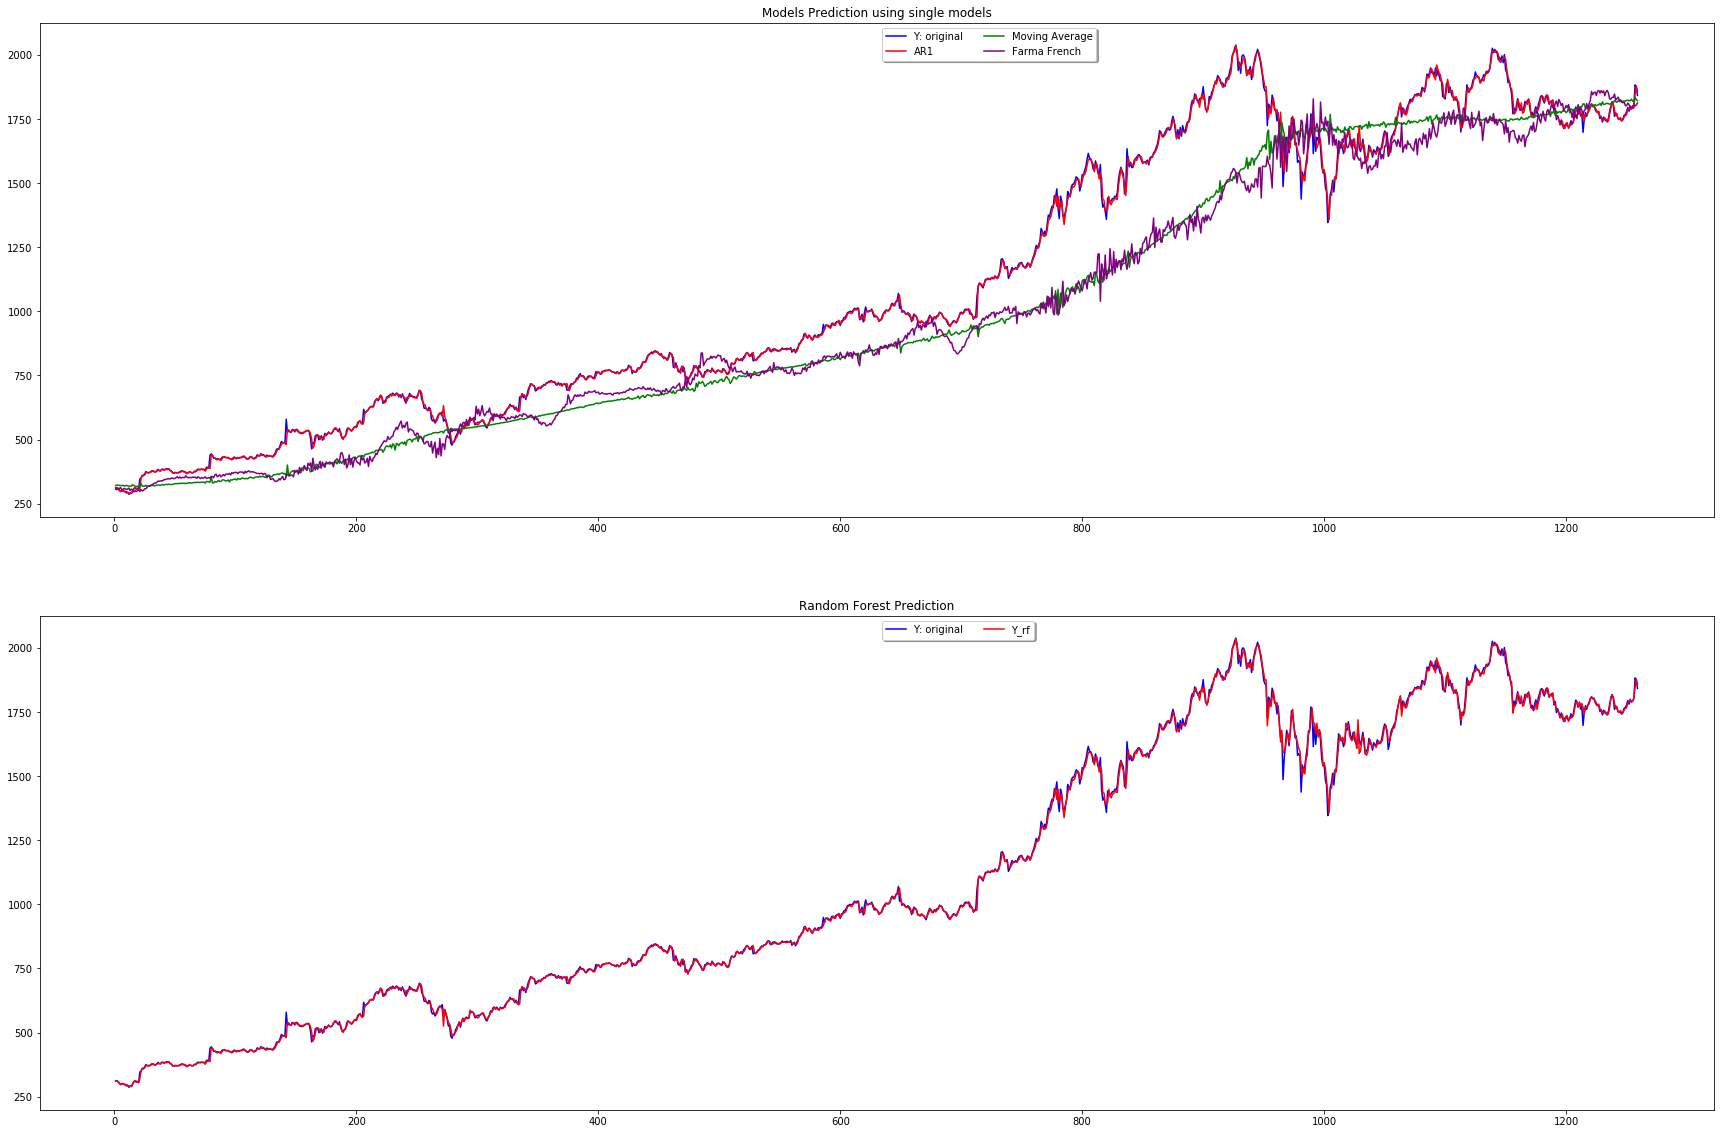

In [17]:
Y_rf,Y, Y_close = Randomforest()

In [18]:
results = np.stack([Y,Y_rf,Y_close],axis=1)

In [19]:
final_results = pd.DataFrame(results,columns=['Y','Y_rf','Y_close'])
final_results.head()

,Y,Y_rf,Y_close
0,311.549988,310.958993,310.350006
1,312.579987,310.874352,308.519989
2,307.010010,309.189957,302.190002
3,302.239990,303.683886,295.290009
4,297.500000,296.966931,298.420013


In [20]:
final_results.head()

,Y,Y_rf,Y_close
0,311.549988,310.958993,310.350006
1,312.579987,310.874352,308.519989
2,307.010010,309.189957,302.190002
3,302.239990,303.683886,295.290009
4,297.500000,296.966931,298.420013


In [21]:
final_results = final_results.reindex()

In [22]:
final_results

,Y,Y_rf,Y_close
0,311.549988,310.958993,310.350006
1,312.579987,310.874352,308.519989
2,307.010010,309.189957,302.190002
3,302.239990,303.683886,295.290009
4,297.500000,296.966931,298.420013
...,...,...,...
1254,1793.810059,1791.568050,1789.209961
1255,1801.010010,1802.779580,1868.770020
1256,1882.920044,1847.237283,1869.800049
1257,1874.000000,1878.658726,1846.890015


In [23]:
final_results.index

RangeIndex(start=0, stop=1259, step=1)